**Abstract:**

This algorithm processes, cleans, and transforms resume data into numerical features through pre-trained TfidfVectorizer. It then trains a machine learning model using a pre-trained classifier to predict the category of the resume.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [34]:
print(df.shape)

(962, 2)


# Exploring Categories

In [35]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

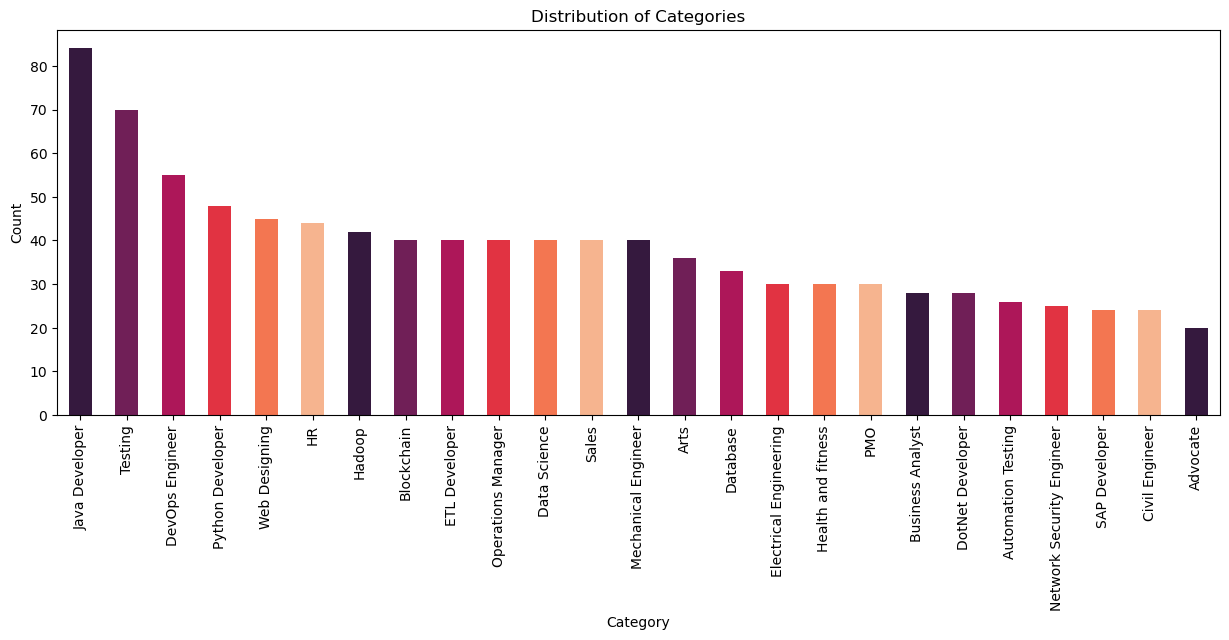

In [36]:
category_counts = df['Category'].value_counts()
rocket_palette = sns.color_palette("rocket")

plt.figure(figsize=(15, 5))
category_counts.plot.bar(x='Category', color=rocket_palette)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [37]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

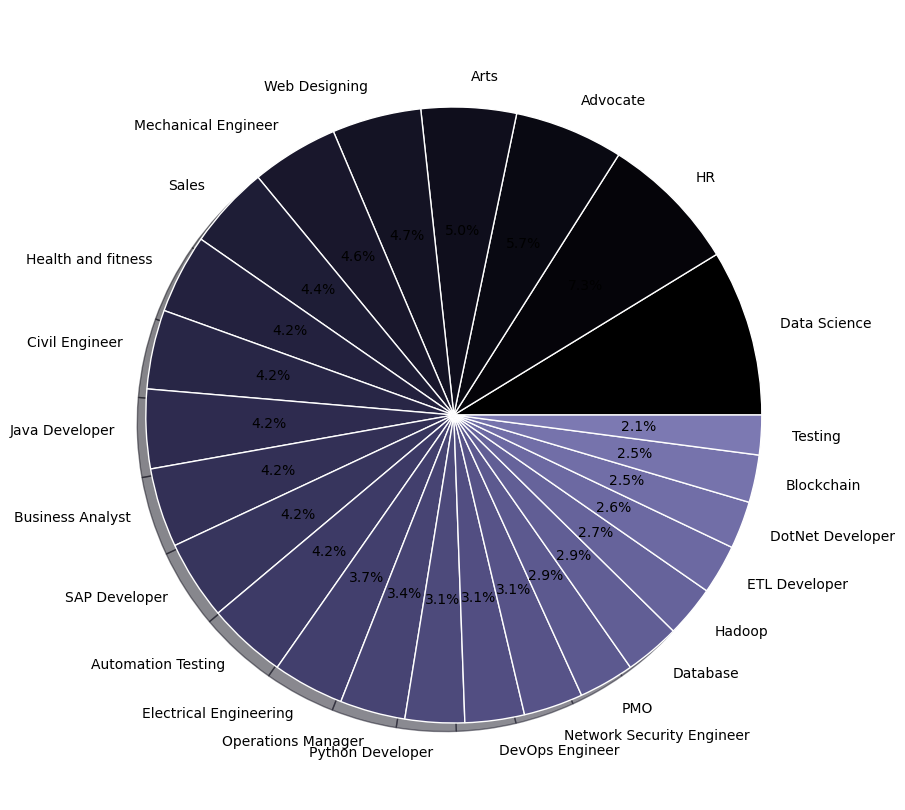

In [38]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

blue_purple_palette = sns.cubehelix_palette(len(labels), start=240, rot=0, dark=0, light=0.5, reverse=True)

plt.figure(figsize=(15, 10))

wedges, texts, autotexts = plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=blue_purple_palette,
                                   textprops=dict(color="black"))

for wedge in wedges:
    wedge.set_edgecolor("white")

plt.title('Distribution of Categories (Pie Chart)', color='white')

plt.show()

# Exploring Resume

In [39]:
df['Category'][0]

'Data Science'

In [40]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [41]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [42]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [43]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [44]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [47]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [48]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vectorization
The "Term Frequency-Inverse Document Frequency" (TF-IDF) transform is used to convert text data into numerical vectors, feeding this text data into machine learning algorithms.

The aim is to use the model to understand important words and relationships between words in text data.

In [49]:
# Term Frequency-Inverse Document Frequency" (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# It does not take into account stop words commonly used in the English language (e.g. "the", "and", "is", etc.)
# TF-IDF matrix is created
tfidf = TfidfVectorizer(stop_words='english')

# It is the learning process of TfidfVectorizer.
tfidf.fit(df['Resume'])

# Converts text data into TF-IDF matrix using the learned TfidfVectorizer.
requiredText = tfidf.transform(df['Resume'])

# Train Test Splitting

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


# Train the model and print the classification report

**OneVsRestClassifier**:

The OneVsRestClassifier class is used to implement this strategy in the scikit-learn library. This class addresses the multiple classification problem as solving a series of binary classification problems. It creates a binary classifier for each class and trains these classifiers. Then, when making predictions, it chooses the class with the highest score among the predictions from each classifier.



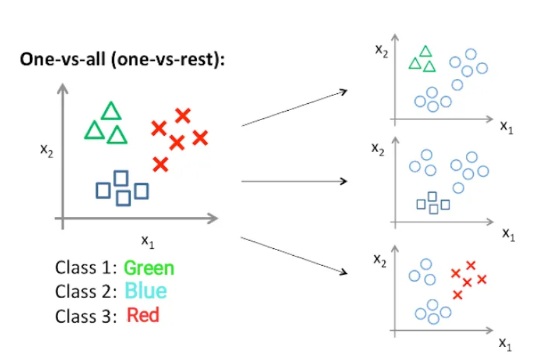

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# This creates a separate binary classifier for each of the multiple classes and trains these binary classifiers.
# KNeighborsClassifier, on the other hand, classifies using the K-Nearest Neighbor (KNN) algorithm.
clf = OneVsRestClassifier(KNeighborsClassifier())

# Model Training
clf.fit(X_train,y_train)

# Predict
ypred = clf.predict(X_test)

# Accuracy Score
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [52]:
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


# Prediction System

In [53]:
import pickle

# Uses the pickle module to serialize and save a tfidf object to a file named 'tfidf.pkl'.at 
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# The term "clf" in machine learning commonly refers to a classifier object
pickle.dump(clf, open('clf.pkl', 'wb'))
# Save trained models

In [56]:
myresume = """

ELIF TUĞBA OLCAR
ELECTRICAL ELECTRONICS ENGINEER

Mobile: 
Linkedln: [tr.linkedin.com/in/eliftugbaolcar](tr.linkedin.com/in/eliftugbaolcar)
Email: eliftugbaolcar@gmail.com
Github: [https://github.com/eliflula](https://github.com/eliflula)
Residence: Ankara, Turkey

PROFESSIONAL EXPERIENCE

TEKNOTAM, Intern
June - August 2022
- An Industrial PLC Card Design was developed to provide alternative solutions for PLC cards.
- Research and implementation were conducted using the ZeroMQ library in socket programming, specifically focusing on Request-Reply, Publish-Subscribe, and Multithreaded server models.

ASELSAN, Research Student
January - June 2022
- A project was done to control two LEDs using the dual-core feature of Raspberry Pi Pico.
- Data was collected for the projectile verification system project using a LIDAR sensor, and data analysis was performed based on the collected data.

Ministry Of National Defense, Intern
June - August 2016
- Socket programming was implemented to manage the communication between the receiver and transmitter.
- A map interface that determines location based on latitude and longitude values was developed using C#.
- The maintenance and repair of military aircraft and helicopters were carried out.

PROJECTS

TÜBİTAK 2209-A - University Students Research Projects Support Program
Detection of Printed Circuit Board (PCB) Connection Errors with Artificial Intelligence Based Image Processing Applications, March 2023 - Current

Gazi University - Graduation Thesis
Tracking and Detection of Military Aircraft Types from Satellite Photos with Deep Learning, March 2023 - Current

CERTIFICATES

Akbank Data Analysis Bootcamp, May 2023
Python: Python Programming for Artificial Intelligence [Udemy Course], DATAAI TEAM, January 2023

COMPUTER SKILLS

Programming Languages and Tools: Python, Keras, TensorFlow, Scikit-Learn, Numpy, Pandas, Plotly, Java, SQL, C#
Softwares and Operating Systems: Altium, Kicad, AutoCAD, Linux, ROS

EDUCATION

Gazi University, B.S. in Electrical Electronics Engineer [GPA: 3.47]
Ankara, September 2019 - Current

Aso Technical College, Electrical and Electronics Department [GPA: 90]
Ankara, September 2014 - January 2018

LANGUAGES

English: Good written and good verbal communication skills

"""


In [57]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
# Cleaned resume using the vectorizer, converting it into a set of numerical features that the machine learning model can understand.
input_features = tfidf.transform([cleaned_resume])

# Used to predict the category ID of cleaned and transformed resume features.
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Data Science
6
